# All-Optical Radiation Reaction at 10^21 W/cm^2

https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.113.134801

Setup: Classical Radiation Reaction in a Plane Wave. Check validity of equation 3 of paper with OSIRIS-QED 1D simulations

Initial electron energy $\gamma_0 = 2000$

- PW different $a_0$, frontal collision
- PW $a_0$=20, varying angle

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import glob

In [3]:
g0 = 2000 #[] initial electron energy

def gf(g0,a0,th):
    """ equation 3 """
    k = 4.4199e-5 * (a0/10)**2 * (1+np.cos(th*np.pi/180) ) / 2
    return g0/(1+k*g0)

# parameter scan: a0 (angle=0)
files = glob.glob('PW/a*103.h5')
files.sort()
gf_a0_sim = np.zeros(len(files))
a0lst_sim = np.zeros_like(gf_a0_sim)
for i in range(len(files)):
    a0 = int(int(files[i][4:6]))
    a0lst_sim[i] = a0
    filef = h5py.File(files[i], 'r')
    enelst1 = np.array(filef['ene'])
    gf_a0_sim[i] = np.mean(enelst1)
a0lst_th = np.linspace(np.min(a0lst_sim),np.max(a0lst_sim),200)
gf_a0_th = gf(g0,a0lst_th,0)
    
# parameter scan: angle (a0=20)
files = glob.glob('PW/th*103.h5')
files.sort()
thlst_sim = np.array([0,15,30,45,60,75,90])
gf_th_sim = np.zeros(len(thlst_sim))
for i in range(len(files)):
    # sim
    filef = h5py.File(files[i], 'r')
    enelst = np.array(filef['ene'])
    qlst = np.array(filef['q'])
    gf_th_sim[i] = np.sum(qlst*enelst)/np.sum(qlst)
thlst_th = np.linspace(0,90,200)
gf_th_th = gf(g0,20,thlst_th)

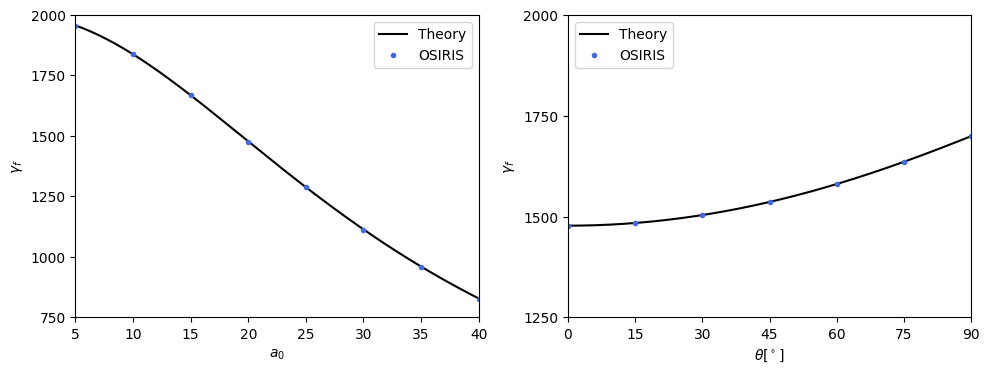

In [5]:
# plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

axes[0].plot(a0lst_th, gf_a0_th,'k-',label='Theory')
axes[0].plot(a0lst_sim, gf_a0_sim,'.',color='royalblue',label='OSIRIS')
axes[0].legend()
axes[0].set_xlabel(r'$a_0$')
axes[0].set_ylabel(r'$\gamma_f$')
#axes[0].set_title(r'PW: $\gamma_e=2000,\lambda=1\mu \mathrm{m},\tau_\mathrm{rise}=50~\omega_p^{-1}$')
axes[0].set_xticks([5,10,15,20,25,30,35,40])
axes[0].set_xlim([5,40])
axes[0].set_yticks([750,1000,1250,1500,1750,2000])
axes[0].set_ylim([750,2000])


axes[1].plot(thlst_th, gf_th_th,'k-',label='Theory')
axes[1].plot(thlst_sim, gf_th_sim,'.',color='royalblue',label='OSIRIS')
axes[1].legend(loc='upper left')
axes[1].set_xlabel(r'$\theta[^\circ]$')
axes[1].set_ylabel(r'$\gamma_f$')
#axes[1].set_title(r'PW: $\gamma_e=2000,a_0=20,\lambda=1\mu \mathrm{m},\tau_\mathrm{rise}=50~\omega_p^{-1}$')
axes[1].set_xticks([0,15,30,45,60,75,90])
axes[1].set_xlim([0,90])
axes[1].set_yticks([1250,1500,1750,2000])

# aspect
for i in range(2):
    xmin, xmax = axes[i].get_xlim()
    ymin, ymax = axes[i].get_ylim()
    axesratio = (ymax-ymin)/(xmax-xmin)
    axes[i].set_aspect(aspect=3/4/axesratio)

plt.tight_layout()
#plt.savefig('PW.pdf',transparent=True)
plt.show()